In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
DATASET_NAME = 'Folktables_CA_2018_Public_Coverage'
EXPERIMENT_SESSION_UUID = '3021b0c7-483d-4682-9dc6-bb4a2cf90020'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
SENSITIVE_ATTR_FOR_INTERVENTION = 'SEX&RAC1P'
# MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier']
MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier', 'MLPClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(114, 33)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall,Test_Set_Index
0,Accuracy,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-03 00:08:01.305,3021b0c7-483d-4682-9dc6-bb4a2cf90020,Exp_iter_1,100,...,1.000000,0.000000,0.707914,1.000000,0.000000,0.683483,1.000000,0.000000,0.697067,0
18,Aleatoric_Uncertainty,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-03 00:08:01.305,3021b0c7-483d-4682-9dc6-bb4a2cf90020,Exp_iter_1,100,...,0.775390,0.845614,0.815641,0.795387,0.864730,0.792791,0.773605,0.834223,0.805496,0
36,Epistemic_Uncertainty,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-03 00:08:01.305,3021b0c7-483d-4682-9dc6-bb4a2cf90020,Exp_iter_1,100,...,0.030288,0.033913,0.031919,0.030848,0.034517,0.031570,0.030556,0.033760,0.031764,0
54,F1,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-03 00:08:01.305,3021b0c7-483d-4682-9dc6-bb4a2cf90020,Exp_iter_1,100,...,1.000000,0.000000,0.455764,1.000000,0.000000,0.468214,1.000000,0.000000,0.461611,0
72,FNR,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-03 00:08:01.305,3021b0c7-483d-4682-9dc6-bb4a2cf90020,Exp_iter_1,100,...,0.000000,1.000000,0.648760,0.000000,1.000000,0.636933,0.000000,1.000000,0.643223,0
90,FPR,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-03 00:08:01.305,3021b0c7-483d-4682-9dc6-bb4a2cf90020,Exp_iter_1,100,...,0.000000,1.000000,0.101545,0.000000,1.000000,0.116959,0.000000,1.000000,0.108176,0
108,IQR,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-03 00:08:01.305,3021b0c7-483d-4682-9dc6-bb4a2cf90020,Exp_iter_1,100,...,0.119043,0.134246,0.126847,0.122159,0.138208,0.123582,0.119401,0.132609,0.125397,0
126,Jitter,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-03 00:08:01.305,3021b0c7-483d-4682-9dc6-bb4a2cf90020,Exp_iter_1,100,...,0.122509,0.185015,0.156852,0.133257,0.214039,0.137541,0.123312,0.168269,0.148278,0
144,Label_Stability,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-03 00:08:01.305,3021b0c7-483d-4682-9dc6-bb4a2cf90020,Exp_iter_1,100,...,0.832156,0.736616,0.782350,0.819234,0.692956,0.809574,0.830721,0.763909,0.794437,0
162,Mean_Prediction,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Folktables_CA_2018_Public_Coverage,200,OK,2024-01-03 00:08:01.305,3021b0c7-483d-4682-9dc6-bb4a2cf90020,Exp_iter_1,100,...,0.643699,0.603361,0.632114,0.646427,0.597424,0.631596,0.639855,0.613762,0.631884,0


In [11]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [13]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [14]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

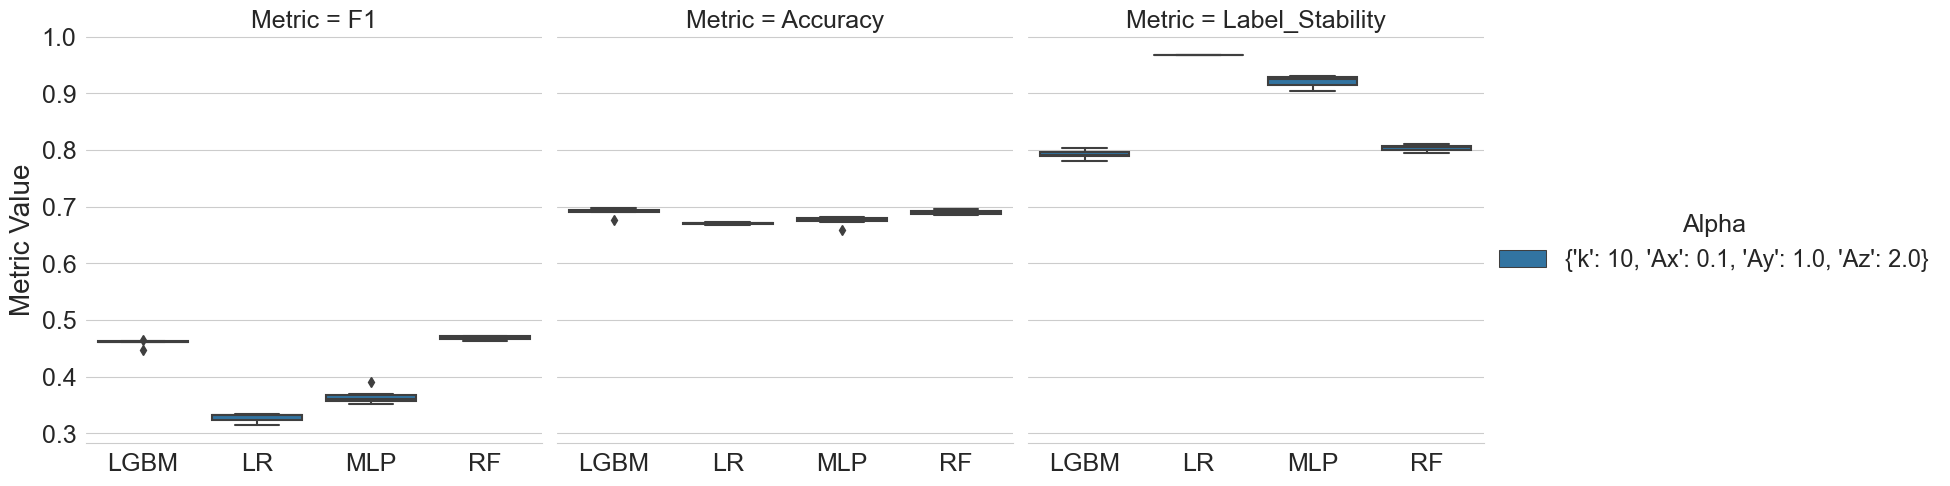

In [15]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           # ylim=(0.75, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

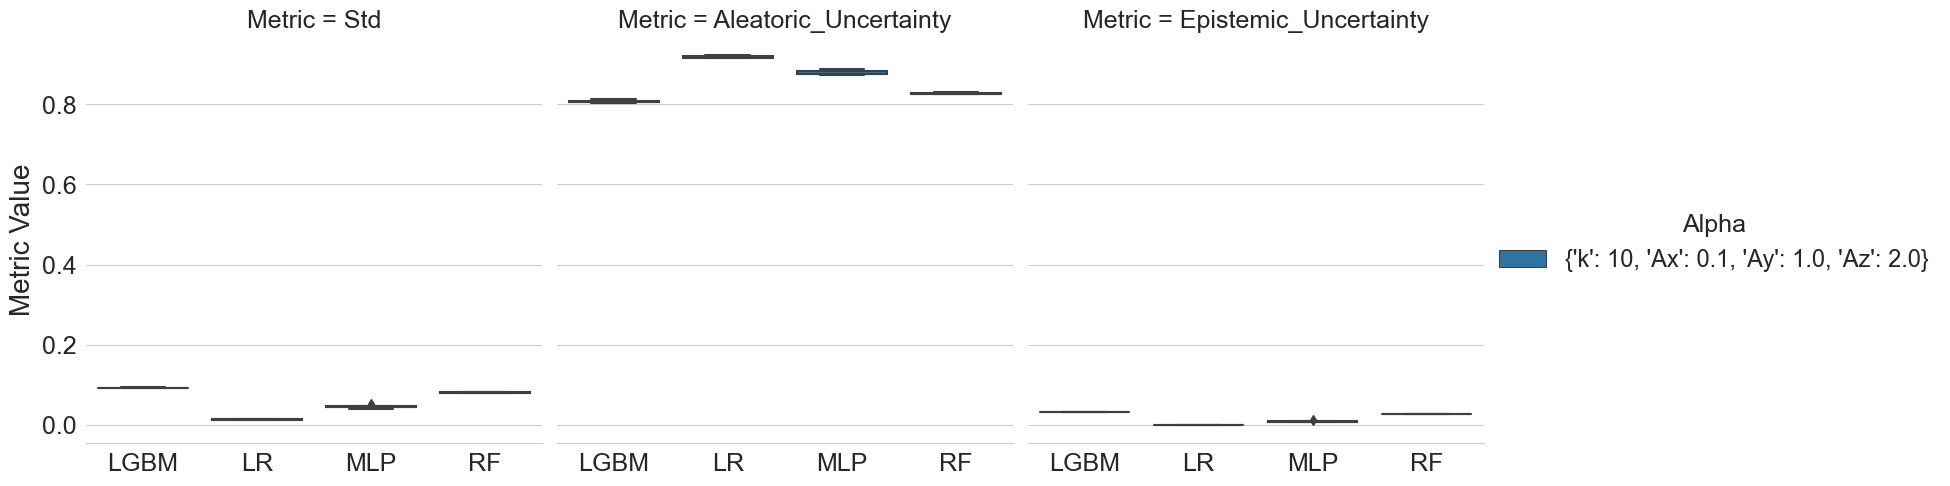

In [16]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           metric_names=['Std', 'Aleatoric_Uncertainty', 'Epistemic_Uncertainty'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

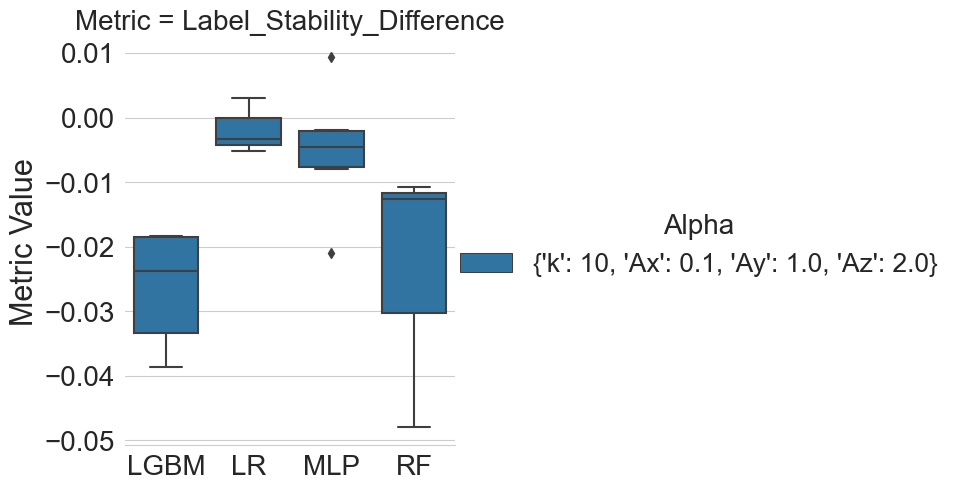

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Label_Stability_Difference'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

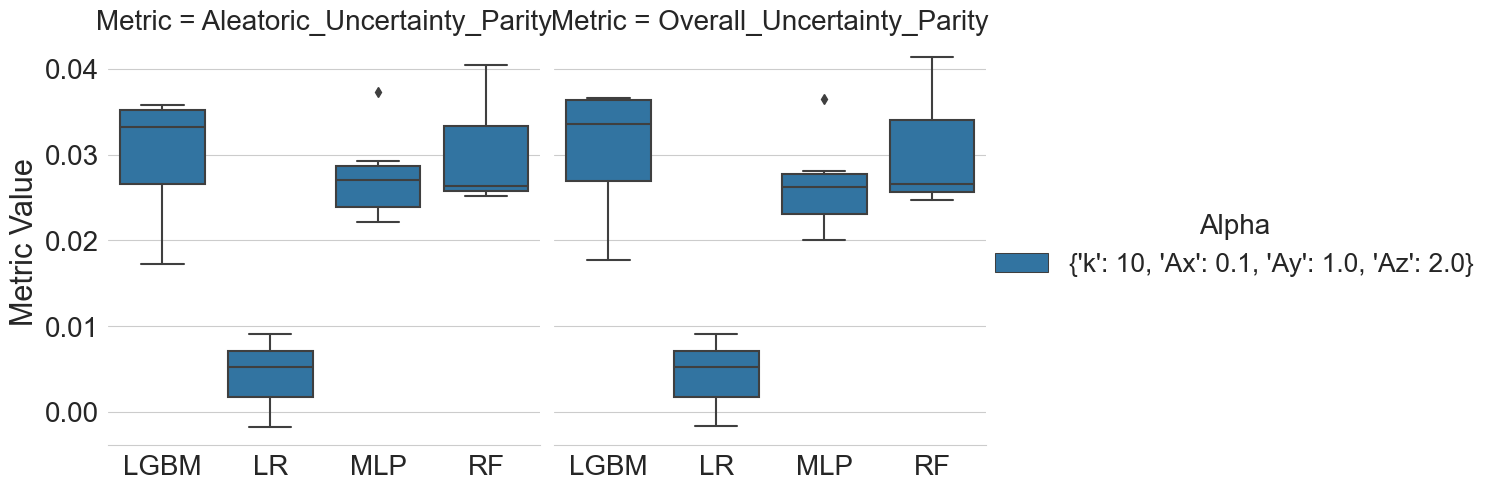

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Aleatoric_Uncertainty_Parity',
                                                         'Overall_Uncertainty_Parity'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

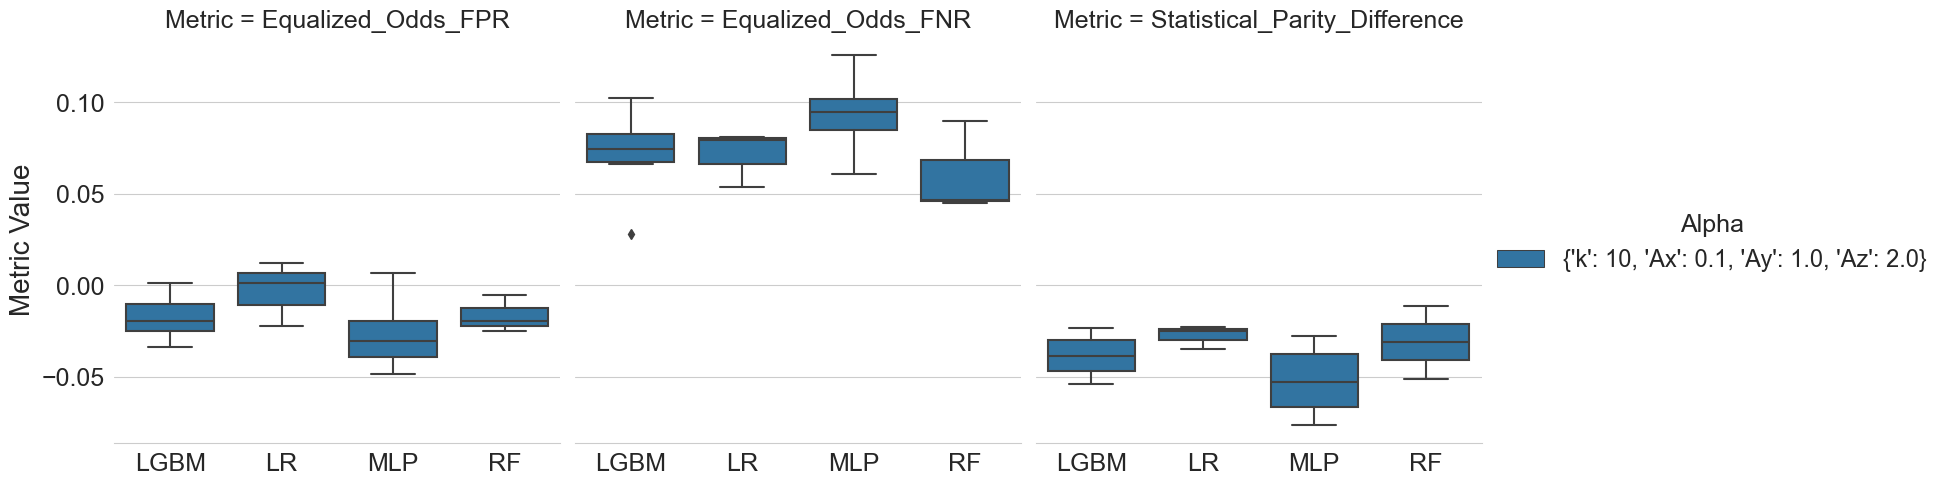

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR', 'Statistical_Parity_Difference'],
                                           vals_to_replace=vals_to_replace)